# Task
Clean, transform, and analyze the NYC taxi trip dataset to extract meaningful insights from real-world data.

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df = pd.read_csv('test.csv')

In [39]:
df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['weekday'] = df_train['pickup_datetime'].dt.dayofweek
df_train['day_of_year'] = df_train['pickup_datetime'].dt.dayofyear
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['minute'] = df_train['pickup_datetime'].dt.minute
df_train['weekend'] = df_train['pickup_datetime'].dt.dayofweek >= 5

df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_minute,is_weekend,trip_distance,year,month,weekday,day_of_year,hour,minute,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,24,0,1.498521,2016,3,0,74,17,24,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,43,1,1.805507,2016,6,6,164,0,43,True
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,35,0,6.385098,2016,1,1,19,11,35,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,32,0,1.485498,2016,4,2,97,19,32,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,30,1,1.188588,2016,3,5,86,13,30,True


In [40]:
df_train = df_train[df_train['passenger_count'] > 0]
df_train = df_train[(df_train['trip_duration'] > 60) & (df_train['trip_duration'] < 4*3600)]
print("Data shape after cleaning:", df_train.shape)

Data shape after cleaning: (1446701, 26)


In [41]:
df_train.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,...,pickup_hour,pickup_minute,is_weekend,trip_distance,year,month,weekday,day_of_year,hour,minute
count,1.446701e+06,1446701,1446701,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1446701.0,...,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1446701.0,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06
mean,1.535052e+00,2016-04-01 09:55:31.947142400,2016-04-01 10:09:32.728920576,1.665493e+00,-7.397363e+01,4.075101e+01,-7.397361e+01,4.075181e+01,8.407818e+02,2016.0,...,1.361198e+01,2.959305e+01,2.851792e-01,3.438013e+00,2016.0,3.516485e+00,3.049623e+00,9.182551e+01,1.361198e+01,2.959305e+01
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,1.000000e+00,-7.425921e+01,4.049620e+01,-7.425982e+01,4.049620e+01,6.100000e+01,2016.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2016.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2016-02-17 16:34:22,2016-02-17 16:49:09,1.000000e+00,-7.399187e+01,4.073742e+01,-7.399133e+01,4.073594e+01,4.010000e+02,2016.0,...,9.000000e+00,1.500000e+01,0.000000e+00,1.244349e+00,2016.0,2.000000e+00,1.000000e+00,4.800000e+01,9.000000e+00,1.500000e+01
50%,2.000000e+00,2016-04-01 16:46:00,2016-04-01 17:04:55,1.000000e+00,-7.398177e+01,4.075414e+01,-7.397978e+01,4.075455e+01,6.650000e+02,2016.0,...,1.400000e+01,3.000000e+01,0.000000e+00,2.105378e+00,2016.0,4.000000e+00,3.000000e+00,9.200000e+01,1.400000e+01,3.000000e+01
75%,2.000000e+00,2016-05-15 03:29:22,2016-05-15 03:40:15,2.000000e+00,-7.396746e+01,4.076836e+01,-7.396315e+01,4.076980e+01,1.075000e+03,2016.0,...,1.900000e+01,4.500000e+01,1.000000e+00,3.887171e+00,2016.0,5.000000e+00,5.000000e+00,1.360000e+02,1.900000e+01,4.500000e+01
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 00:48:20,9.000000e+00,-7.369056e+01,4.091156e+01,-7.369013e+01,4.092000e+01,1.424300e+04,2016.0,...,2.300000e+01,5.900000e+01,1.000000e+00,4.510965e+01,2016.0,6.000000e+00,6.000000e+00,1.820000e+02,2.300000e+01,5.900000e+01
std,4.987700e-01,NaN,NaN,1.314839e+00,3.769513e-02,2.783839e-02,3.466572e-02,3.186401e-02,6.576240e+02,0.0,...,6.395942e+00,1.732405e+01,4.514999e-01,3.873986e+00,0.0,1.681020e+00,1.953749e+00,5.156499e+01,6.395942e+00,1.732405e+01


In [42]:
df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime'] = pd.to_datetime(df_train['dropoff_datetime'])

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [43]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_minute,is_weekend,trip_distance,year,month,weekday,day_of_year,hour,minute,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,24,0,1.498521,2016,3,0,74,17,24,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,43,1,1.805507,2016,6,6,164,0,43,True
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,35,0,6.385098,2016,1,1,19,11,35,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,32,0,1.485498,2016,4,2,97,19,32,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,30,1,1.188588,2016,3,5,86,13,30,True


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446701 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1446701 non-null  object        
 1   vendor_id           1446701 non-null  int64         
 2   pickup_datetime     1446701 non-null  datetime64[ns]
 3   dropoff_datetime    1446701 non-null  datetime64[ns]
 4   passenger_count     1446701 non-null  int64         
 5   pickup_longitude    1446701 non-null  float64       
 6   pickup_latitude     1446701 non-null  float64       
 7   dropoff_longitude   1446701 non-null  float64       
 8   dropoff_latitude    1446701 non-null  float64       
 9   store_and_fwd_flag  1446701 non-null  object        
 10  trip_duration       1446701 non-null  int64         
 11  pickup_year         1446701 non-null  int32         
 12  pickup_month        1446701 non-null  int32         
 13  pickup_day_of_wee

In [45]:
df_train.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,...,pickup_hour,pickup_minute,is_weekend,trip_distance,year,month,weekday,day_of_year,hour,minute
count,1.446701e+06,1446701,1446701,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1446701.0,...,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1446701.0,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06,1.446701e+06
mean,1.535052e+00,2016-04-01 09:55:31.947142400,2016-04-01 10:09:32.728920576,1.665493e+00,-7.397363e+01,4.075101e+01,-7.397361e+01,4.075181e+01,8.407818e+02,2016.0,...,1.361198e+01,2.959305e+01,2.851792e-01,3.438013e+00,2016.0,3.516485e+00,3.049623e+00,9.182551e+01,1.361198e+01,2.959305e+01
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,1.000000e+00,-7.425921e+01,4.049620e+01,-7.425982e+01,4.049620e+01,6.100000e+01,2016.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2016.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2016-02-17 16:34:22,2016-02-17 16:49:09,1.000000e+00,-7.399187e+01,4.073742e+01,-7.399133e+01,4.073594e+01,4.010000e+02,2016.0,...,9.000000e+00,1.500000e+01,0.000000e+00,1.244349e+00,2016.0,2.000000e+00,1.000000e+00,4.800000e+01,9.000000e+00,1.500000e+01
50%,2.000000e+00,2016-04-01 16:46:00,2016-04-01 17:04:55,1.000000e+00,-7.398177e+01,4.075414e+01,-7.397978e+01,4.075455e+01,6.650000e+02,2016.0,...,1.400000e+01,3.000000e+01,0.000000e+00,2.105378e+00,2016.0,4.000000e+00,3.000000e+00,9.200000e+01,1.400000e+01,3.000000e+01
75%,2.000000e+00,2016-05-15 03:29:22,2016-05-15 03:40:15,2.000000e+00,-7.396746e+01,4.076836e+01,-7.396315e+01,4.076980e+01,1.075000e+03,2016.0,...,1.900000e+01,4.500000e+01,1.000000e+00,3.887171e+00,2016.0,5.000000e+00,5.000000e+00,1.360000e+02,1.900000e+01,4.500000e+01
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 00:48:20,9.000000e+00,-7.369056e+01,4.091156e+01,-7.369013e+01,4.092000e+01,1.424300e+04,2016.0,...,2.300000e+01,5.900000e+01,1.000000e+00,4.510965e+01,2016.0,6.000000e+00,6.000000e+00,1.820000e+02,2.300000e+01,5.900000e+01
std,4.987700e-01,NaN,NaN,1.314839e+00,3.769513e-02,2.783839e-02,3.466572e-02,3.186401e-02,6.576240e+02,0.0,...,6.395942e+00,1.732405e+01,4.514999e-01,3.873986e+00,0.0,1.681020e+00,1.953749e+00,5.156499e+01,6.395942e+00,1.732405e+01


In [46]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,hour
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23


In [47]:
print("Data Shape:", df.shape)

Data Shape: (625134, 10)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
 9   hour                625134 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 45.3+ MB


In [49]:
import numpy as np

In [50]:
latitudes = df['pickup_latitude'].to_numpy()

In [51]:
mean_lat = np.mean(latitudes)

In [52]:
print("Average Latitude:", mean_lat)

Average Latitude: 40.75092741194779


In [53]:
import matplotlib.pyplot as plt

In [54]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## Using 1000 trips to make it faster and clear

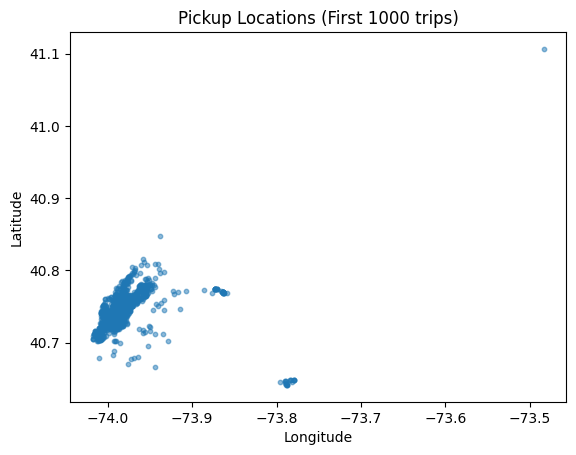

In [55]:
plt.scatter(df['pickup_longitude'][:1000], df['pickup_latitude'][:1000], s=10, alpha=0.5)
plt.title('Pickup Locations (First 1000 trips)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [56]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [57]:
df['hour'] = df['pickup_datetime'].dt.hour

In [58]:
df[['pickup_datetime', 'hour']].head()

,pickup_datetime,hour
0,2016-06-30 23:59:58,23
1,2016-06-30 23:59:53,23
2,2016-06-30 23:59:47,23
3,2016-06-30 23:59:41,23
4,2016-06-30 23:59:33,23


# Task
To work with the NYC taxi data, I’ll first remove trips that have pickup or dropoff locations outside the NYC area. Next, I’ll calculate the distance of each trip using the Haversine formula and add it as a new column. After that, I’ll look at the distributions of trip duration, distance, and passenger count with some charts, and also explore patterns based on time, like hours, days, or months.

In [59]:
min_lon, max_lon = -74.26, -73.69
min_lat, max_lat = 40.49, 40.92
df_train = df_train[
    (df_train['pickup_longitude'].between(min_lon, max_lon)) &
    (df_train['pickup_latitude'].between(min_lat, max_lat)) &
    (df_train['dropoff_longitude'].between(min_lon, max_lon)) &
    (df_train['dropoff_latitude'].between(min_lat, max_lat))
]
print(f"Data shape after removing trips outside NYC:", df_train.shape)

Data shape after removing trips outside NYC: (1446701, 26)


In [60]:
import numpy as np

In [61]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


In [62]:
df_train['trip_distance'] = df_train.apply(
    lambda row: haversine_distance(
        row['pickup_latitude'], row['pickup_longitude'],
        row['dropoff_latitude'], row['dropoff_longitude']
    ),
    axis=1
)

In [63]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_minute,is_weekend,trip_distance,year,month,weekday,day_of_year,hour,minute,weekend
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,24,0,1.498521,2016,3,0,74,17,24,False
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,43,1,1.805507,2016,6,6,164,0,43,True
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,35,0,6.385098,2016,1,1,19,11,35,False
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,32,0,1.485498,2016,4,2,97,19,32,False
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,30,1,1.188588,2016,3,5,86,13,30,True


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

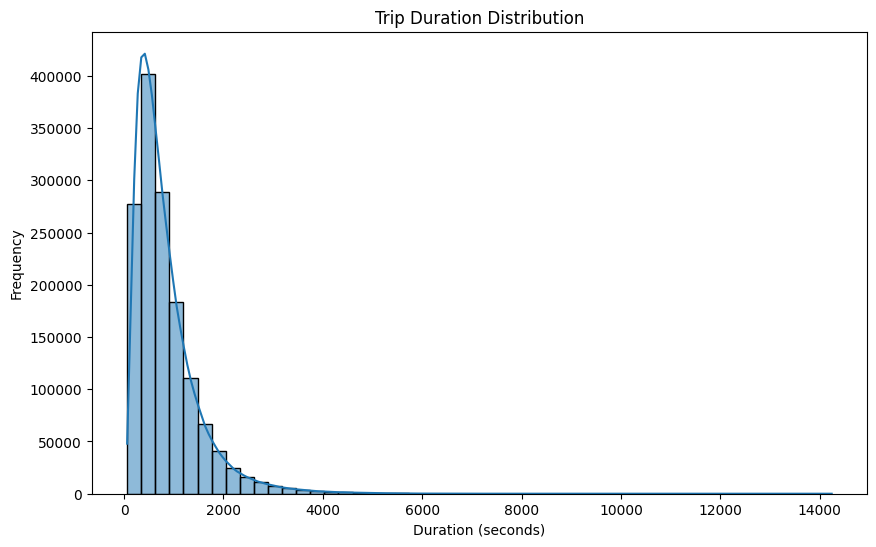

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['trip_duration'], bins=50, kde=True)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


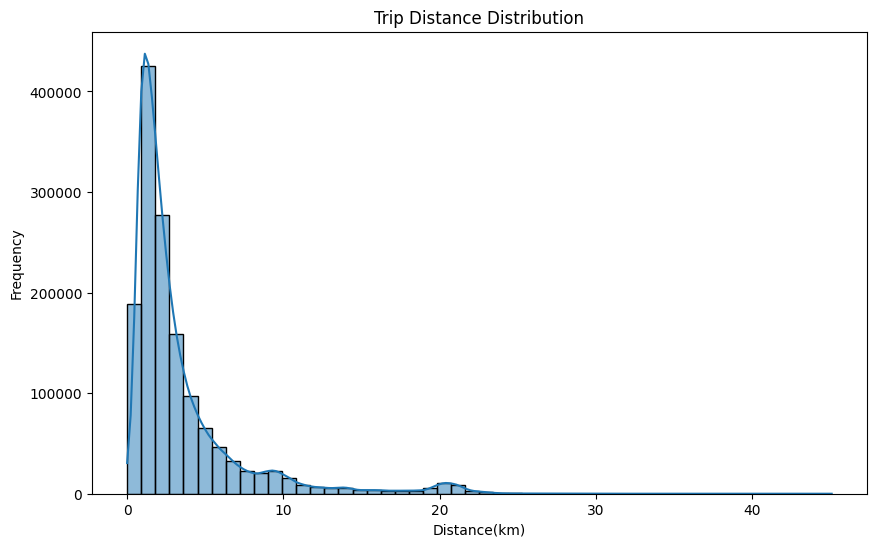

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['trip_distance'], bins=50, kde=True)
plt.title('Trip Distance Distribution')
plt.xlabel('Distance(km)')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-781993308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='passenger_count', palette='viridis')


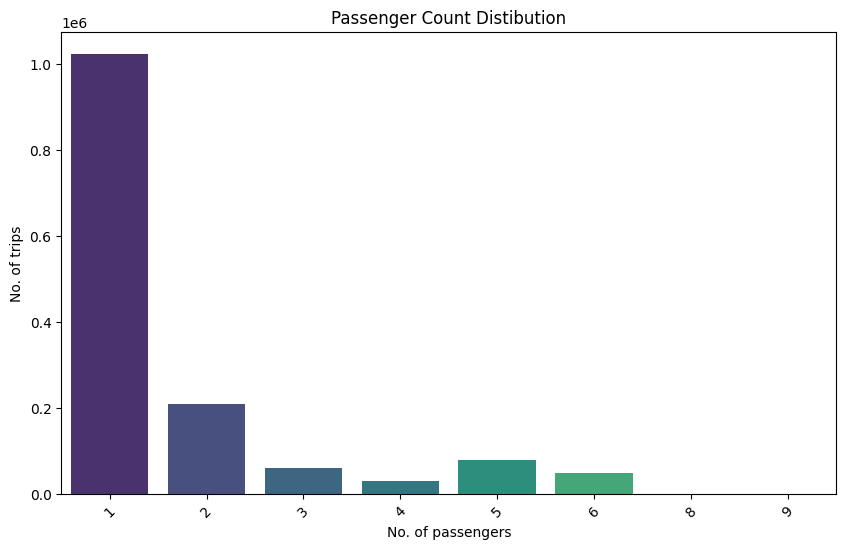

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='passenger_count', palette='viridis')
plt.title('Passenger Count Distibution')
plt.xlabel('No. of passengers')
plt.ylabel('No. of trips')
plt.xticks(rotation=45)
plt.show()

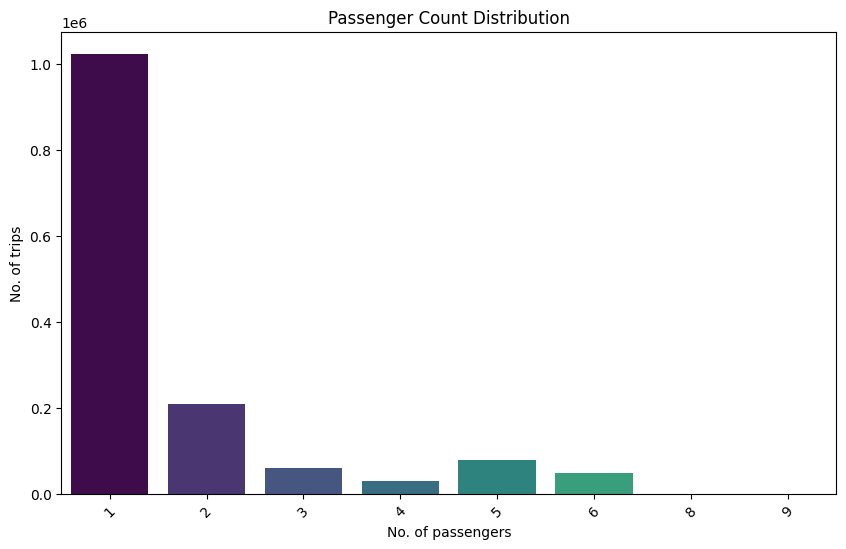

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='passenger_count', hue='passenger_count', palette='viridis', legend=False)
plt.title('Passenger Count Distribution')
plt.xlabel('No. of passengers')
plt.ylabel('No. of trips')
plt.xticks(rotation=45)
plt.show()

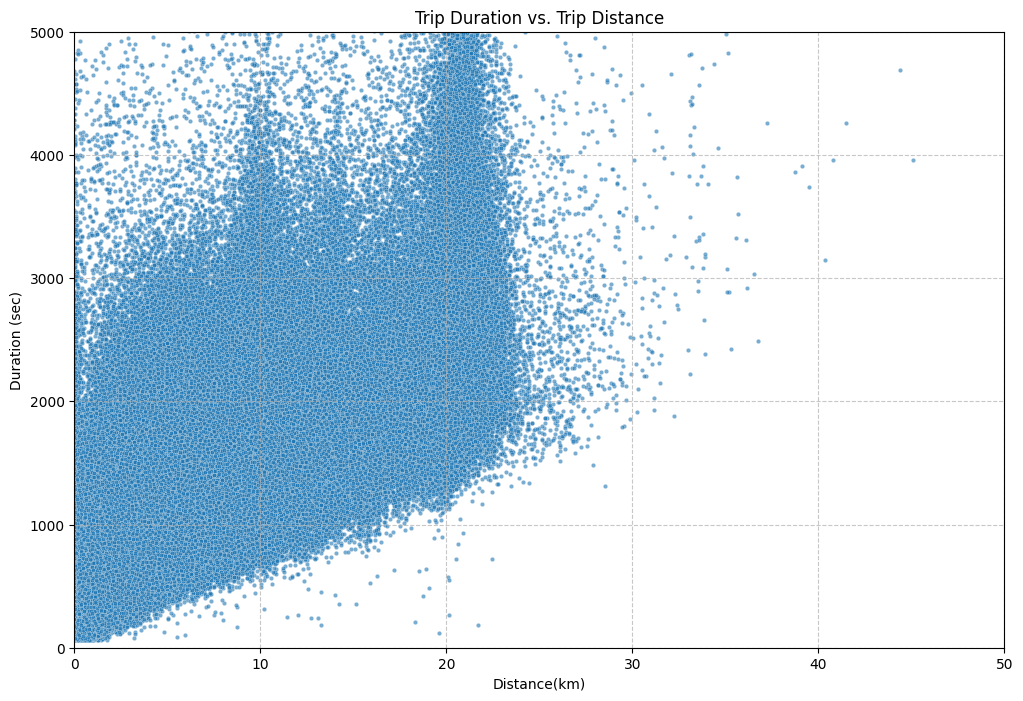

In [70]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='trip_distance', y='trip_duration', data=df_train, alpha=0.6, s=10)
plt.title('Trip Duration vs. Trip Distance')
plt.xlabel('Distance(km)')
plt.ylabel('Duration (sec)')
plt.xlim(0, 50)  # Limit x-axis to focus on main data cluster
plt.ylim(0, 5000) # Limit y-axis to focus on main data cluster
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-4260539085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_hour', y='trip_count', data=trip_counts_by_hour, palette='viridis')


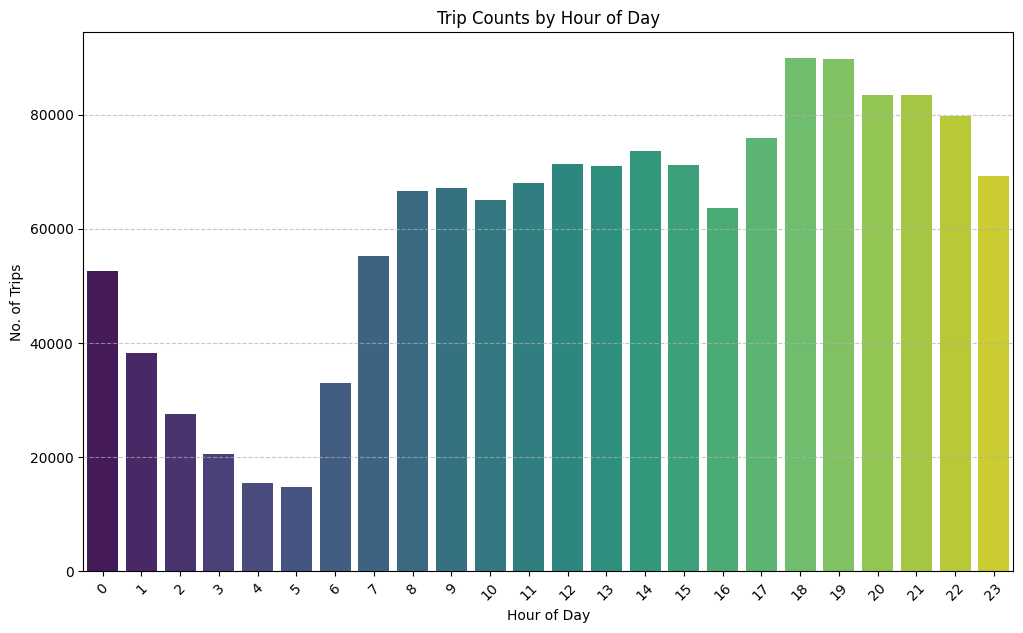

In [71]:
trip_counts_by_hour = df_train.groupby('pickup_hour').size().reset_index(name='trip_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='pickup_hour', y='trip_count', data=trip_counts_by_hour, palette='viridis')
plt.title('Trip Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('No. of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


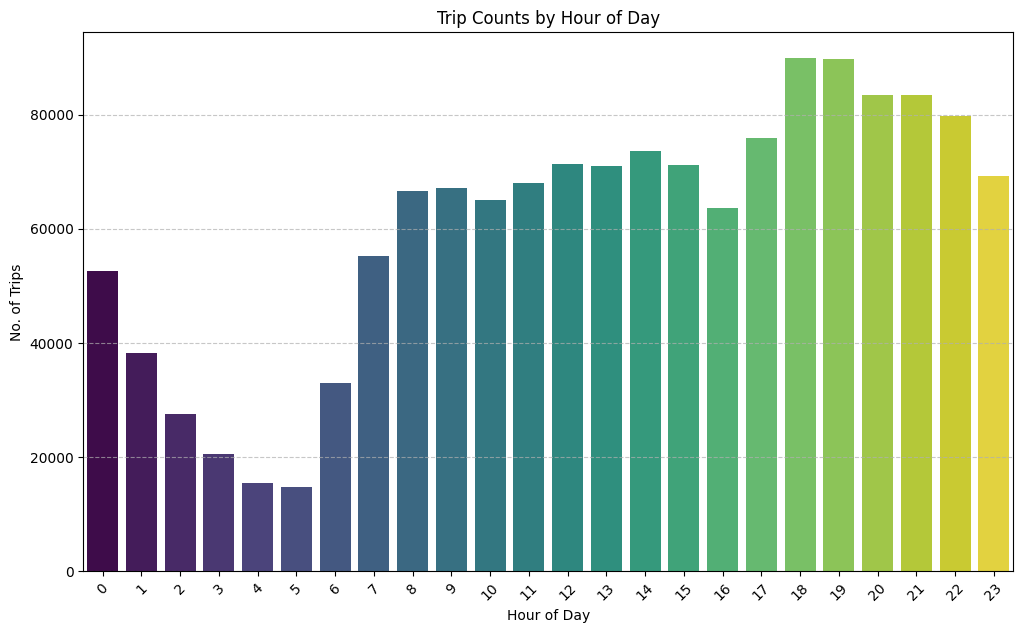

In [72]:
trip_counts_by_hour = df_train.groupby('pickup_hour').size().reset_index(name='trip_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='pickup_hour', y='trip_count', data=trip_counts_by_hour, hue='pickup_hour', palette='viridis', legend=False)
plt.title('Trip Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('No. of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

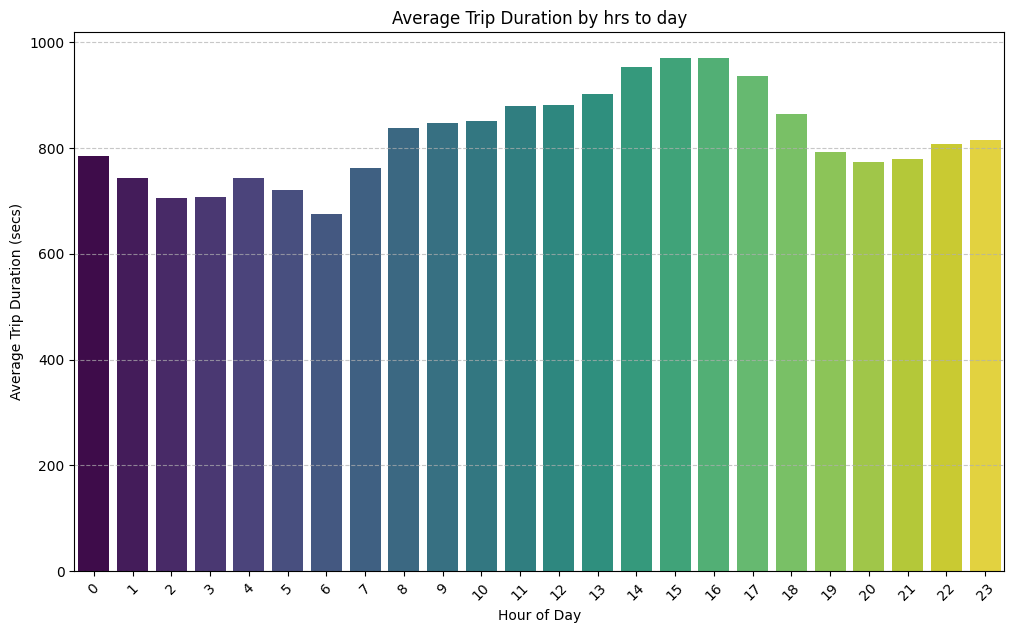

In [74]:
avg_trip_duration_by_hour = df_train.groupby('pickup_hour')['trip_duration'].mean().reset_index(name='average_trip_duration')

plt.figure(figsize=(12, 7))
sns.barplot(x='pickup_hour', y='average_trip_duration', data=avg_trip_duration_by_hour, hue='pickup_hour', palette='viridis', legend=False)
plt.title('Average Trip Duration by hrs to day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (secs)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

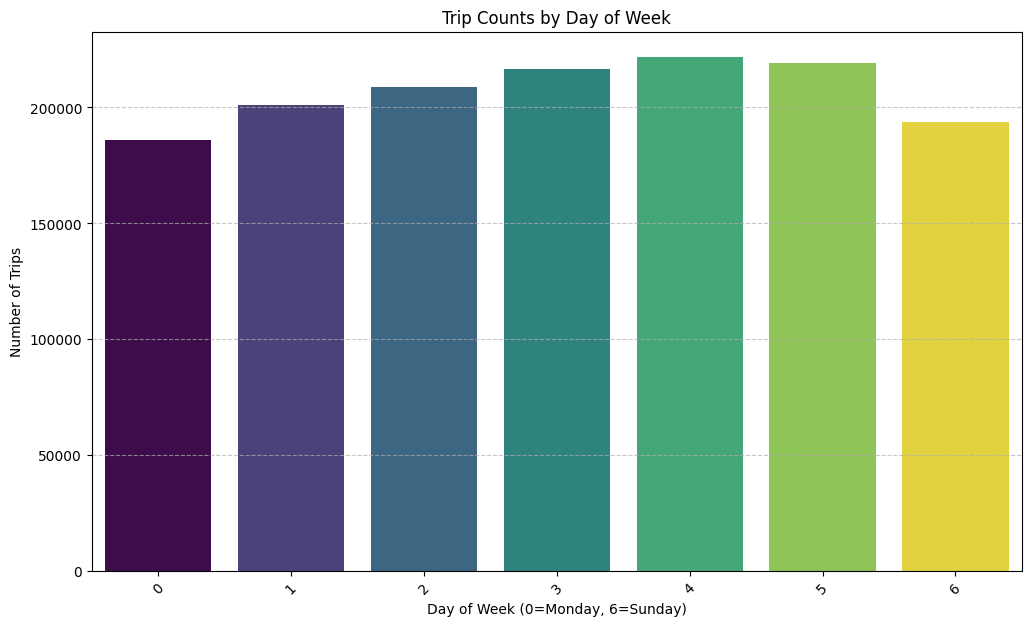

In [75]:
trip_counts_by_day = df_train.groupby('pickup_day_of_week').size().reset_index(name='trip_count')

plt.figure(figsize=(12, 7))
sns.barplot(x='pickup_day_of_week', y='trip_count', data=trip_counts_by_day, hue='pickup_day_of_week', palette='viridis', legend=False)
plt.title('Trip Counts by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

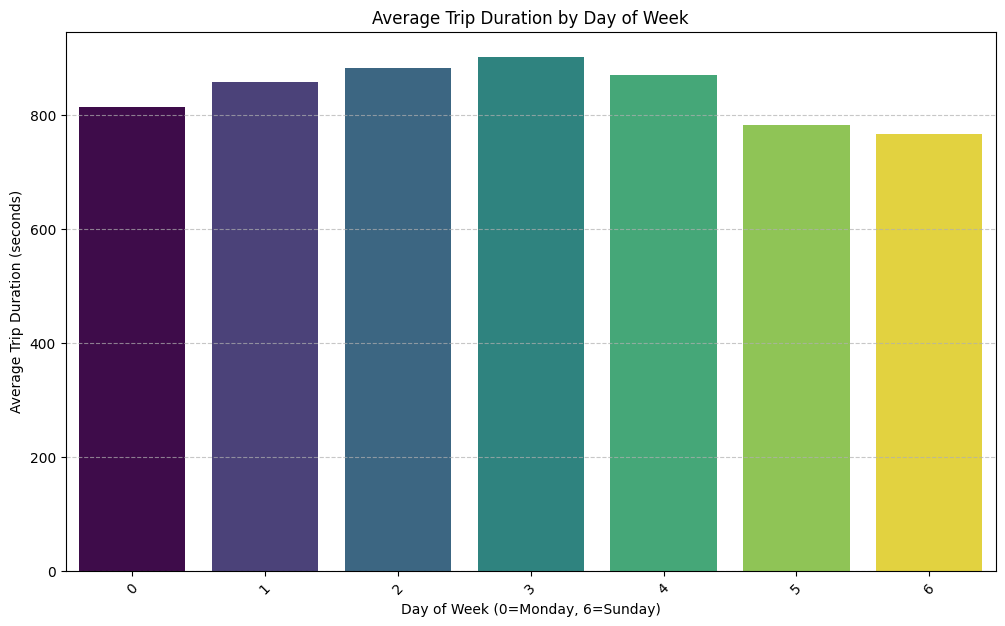

In [76]:
avg_trip_duration_by_day = df_train.groupby('pickup_day_of_week')['trip_duration'].mean().reset_index(name='average_trip_duration')

plt.figure(figsize=(12, 7))
sns.barplot(x='pickup_day_of_week', y='average_trip_duration', data=avg_trip_duration_by_day, hue='pickup_day_of_week', palette='viridis', legend=False)
plt.title('Average Trip Duration by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [77]:
df_train['trip_duration_minutes'] = df_train['trip_duration'] / 60
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,is_weekend,trip_distance,year,month,weekday,day_of_year,hour,minute,weekend,trip_duration_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,1.498521,2016,3,0,74,17,24,False,7.583333
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1,1.805507,2016,6,6,164,0,43,True,11.050000
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,6.385098,2016,1,1,19,11,35,False,35.400000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,1.485498,2016,4,2,97,19,32,False,7.150000
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1,1.188588,2016,3,5,86,13,30,True,7.250000


## Analyse

In this project, I explored the NYC Taxi Trip Duration dataset to better understand how taxi trips vary by time, passenger count, and trip length. By cleaning the data, creating new features, and visualizing different patterns, I was able to gain useful insights from real-world data.
The analysis showed that taxi usage is highest during common commuting hours, especially in the late afternoon and early evening. Trips during these peak hours also tend to take longer, likely because of increased traffic. Late-night and early-morning trips are usually shorter due to less congestion.
Most taxi rides are taken by a single passenger, which suggests that taxis are mainly used for individual travel rather than group transportation. Trips with two passengers are the second most common, while higher passenger counts occur much less frequently.
In terms of trip duration, most rides are relatively short, typically lasting under 15 minutes. Although a few longer trips increase the average duration, the majority of trips are quick. Weekday trips, particularly in the middle of the week, are slightly longer than weekend trips, likely due to work-related travel and traffic.
Overall, this project helped me practice essential data analysis skills such as data cleaning, feature engineering, grouping, and visualization. It also showed how meaningful insights can be drawn from simple analysis of real-world datasets, making this a valuable learning experience for my data analysis portfolio.